In [1]:
import numpy as np
import nengo
import matplotlib as mpl
import matplotlib.pyplot as plt
from nengo.utils.ensemble import tuning_curves
from nengo.dists import Uniform

In [2]:
def make_neuron_population_and_compute_decoders(sigma=0.0, N=10):
    """
    sigma: regularisation parameter (0 means ignore noise). This
    will internally be multiplied by the maximum neural firing
    rate.
    N: number of neurons in the population.
    """

    model = nengo.Network()
    with model:
        # Defaults to LIF neurons, with random gains and biases for neurons
        # between 100-200hz over -1,1
        neurons = nengo.Ensemble(
            N, dimensions=1, max_rates=Uniform(100,200))

        # This is just to generate the decoders
        connection = nengo.Connection(
            neurons, neurons,
            solver=nengo.solvers.LstsqL2(reg=sigma))

    # Compute the decoders
    sim = nengo.Simulator(model)
    D = sim.data[connection].weights

    # Fetch the tuning curves
    xs, A = tuning_curves(neurons, sim)
    return D, A, xs

In [3]:
def plot_decoding_example(D, A, xs):
    # Compute the decoded value
    xs_hat = D @ A.T

    # Plot the tuning curves
    fig, axs = plt.subplots(1, 3, figsize=(6.5, 2.25))
    axs[0].plot(xs, A)
    axs[0].set_xlabel('Represented value $x$')
    axs[0].set_ylabel('Firing Rate (Hz)')
    axs[0].set_title('Population Tuning Curves')
    axs[0].set_ylim(0, 200)
    axs[0].set_xlim(-1, 1)

    # Plot the represented value (ideal) and the decoded value
    axs[1].plot(xs, xs, 'k--', label='Ideal')
    axs[1].plot(xs, xs_hat.T, label='Decoded')
    axs[1].set_title('Ideal and Decoded Value')
    axs[1].set_xlabel('Represented value $x$')
    axs[1].set_ylabel('Decoded $\hat{x}$')
    axs[1].set_ylim(-1, 1)
    axs[1].set_xlim(-1, 1)
    leg = axs[1].legend(loc='best', ncol=1)

    # Plot the error
    RMSE = np.sqrt(np.mean(np.square(xs_hat.T - xs)))
    axs[2].plot(xs, xs_hat.T - xs)
    axs[2].set_title('Error (RMSE = {:0.2f})'.format(RMSE))
    axs[2].set_xlabel('Represented value $x$')
    axs[2].set_ylabel('Error $\hat{x}-x$')
    axs[2].set_xlim(-1, 1)

    fig.tight_layout(pad=0.5)
    return fig, axs, leg

HtmlProgressBar cannot be displayed. Please use the TerminalProgressBar. It can be enabled with `nengo.rc.set('progress', 'progress_bar', 'nengo.utils.progress.TerminalProgressBar')`.

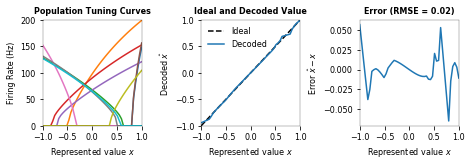

In [4]:
# Make the following reproducible
seed = 5660
np.random.seed(seed)

# Default example without noise on the neural activities
fig, _, _ = plot_decoding_example(
    *make_neuron_population_and_compute_decoders())
fig.savefig("../decoding_example_no_noise.pdf", transparent=True, bbox_inches="tight")

HtmlProgressBar cannot be displayed. Please use the TerminalProgressBar. It can be enabled with `nengo.rc.set('progress', 'progress_bar', 'nengo.utils.progress.TerminalProgressBar')`.

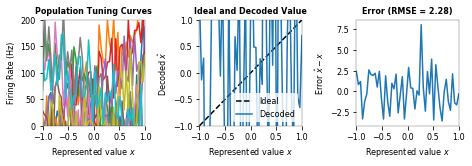

In [5]:
np.random.seed(seed)

# Add some noise to A
D, A, xs = make_neuron_population_and_compute_decoders()
A += np.random.normal(0, 0.2 * np.max(A), A.shape)
mpl.rcParams['legend.frameon'] = True
mpl.rcParams['legend.edgecolor'] = 'None'
fig, _, leg = plot_decoding_example(D, A, xs)
mpl.rcParams['legend.frameon'] = False

fig.savefig("../decoding_example_noise.pdf", transparent=True, bbox_inches="tight")

HtmlProgressBar cannot be displayed. Please use the TerminalProgressBar. It can be enabled with `nengo.rc.set('progress', 'progress_bar', 'nengo.utils.progress.TerminalProgressBar')`.

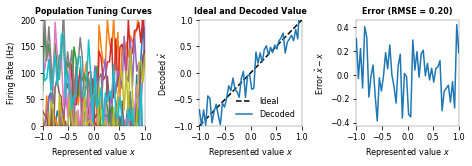

In [6]:
np.random.seed(seed)

# Add some noise to A
D, A, xs = make_neuron_population_and_compute_decoders(sigma=0.2)
A += np.random.normal(0, 0.2 * np.max(A), A.shape)
fig, _, _ = plot_decoding_example(D, A, xs)
fig.savefig("../decoding_example_noise_accounted.pdf", transparent=True, bbox_inches="tight")

HtmlProgressBar cannot be displayed. Please use the TerminalProgressBar. It can be enabled with `nengo.rc.set('progress', 'progress_bar', 'nengo.utils.progress.TerminalProgressBar')`.

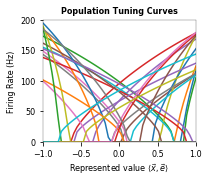

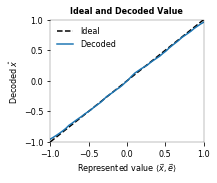

In [7]:
# Large pictures for summary slides
np.random.seed(seed)
D, A, xs = make_neuron_population_and_compute_decoders(sigma=0.2, N=30)
xs_hat = D @ A.T

fig, ax = plt.subplots(figsize=(2.75, 2.25))
ax.plot(xs, A)
ax.set_xlabel('Represented value $\\langle \\vec x, \\vec e \\rangle$')
ax.set_ylabel('Firing Rate (Hz)')
ax.set_title('Population Tuning Curves')
ax.set_ylim(0, 200)
ax.set_xlim(-1, 1)
fig.savefig("../tuning_curves.pdf", transparent=True, bbox_inches="tight")

fig, ax = plt.subplots(figsize=(2.75, 2.25))
ax.plot(xs, xs, 'k--', label='Ideal')
ax.plot(xs, xs_hat.T, label='Decoded')
ax.set_title('Ideal and Decoded Value')
ax.set_xlabel('Represented value $\\langle \\vec x, \\vec e \\rangle$')
ax.set_ylabel('Decoded $\\hat{x}$')
ax.set_ylim(-1, 1)
ax.set_xlim(-1, 1)
leg = ax.legend(loc='best', ncol=1)

fig.savefig("../decoding.pdf", transparent=True, bbox_inches="tight")